Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset

In [2]:
#Convert the dataset to dataframe
dataFrame = pd.read_csv("cars_ds_final.csv",index_col=0)

In [3]:
#Checking if there are null values
dataFrame.isna().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

Creating a new column - "Car Name" by combining the make and the model

In [4]:
dataFrame["car name"] = dataFrame["Make"] + "-" + dataFrame["Model"]
dataFrame.loc[dataFrame["car name"].isnull(),"car name"] = dataFrame["Model"]

Data Cleaning Process

In [5]:
dataFrame["Ex-Showroom_Price"] = dataFrame["Ex-Showroom_Price"].str.replace(",","")
dataFrame["Ex-Showroom_Price"] = dataFrame["Ex-Showroom_Price"].str.replace("Rs. ","")
dataFrame["Displacement"] = dataFrame["Displacement"].str.replace(" cc","")

In [7]:
dataFrame["Displacement"].fillna(0,inplace=True)
dataFrame["USB_Ports"].fillna(0,inplace=True)

In [8]:
dataFrame['Cylinders'].fillna(dataFrame['Cylinders'].median(),inplace=True)
dataFrame['Cylinders'].isna().sum()

0

In [9]:
dataFrame['Valves_Per_Cylinder'].fillna(dataFrame['Valves_Per_Cylinder'].median(),inplace=True)
dataFrame['Valves_Per_Cylinder'].isna().sum()

0

In [40]:
dataFrame["Emission_Norm"] = dataFrame["Emission_Norm"].str.replace("BS IV","BS 4")
dataFrame["Fuel_Tank_Capacity"] = dataFrame["Fuel_Tank_Capacity"].str.replace(" litres","")
dataFrame["Height"] = dataFrame["Height"].str.replace("mm","")
dataFrame["Length"] = dataFrame["Length"].str.replace("mm","")
dataFrame["Width"] = dataFrame["Width"].str.replace("mm","")
dataFrame["City_Mileage"] = dataFrame["City_Mileage"].str.replace("?","") 
dataFrame["City_Mileage"] = dataFrame["City_Mileage"].str.replace("km/litre","") 
dataFrame["Highway_Mileage"] = dataFrame["Highway_Mileage"].str.replace("km/litre","") 
dataFrame["Highway_Mileage"] = dataFrame["Highway_Mileage"].str.replace("km/litre","") 
dataFrame["ARAI_Certified_Mileage"] = dataFrame["ARAI_Certified_Mileage"].str.replace("km/litre","") 
dataFrame["Ground_Clearance"] = dataFrame["Ground_Clearance"].str.replace("mm","") 
dataFrame["ARAI_Certified_Mileage_for_CNG"] = dataFrame["ARAI_Certified_Mileage_for_CNG"].str.replace(" km/kg","") 
dataFrame["Emission_Norm"] = dataFrame["Emission_Norm"].str.replace("BS III","BS 3") 
dataFrame["Emission_Norm"] = dataFrame["Emission_Norm"].str.replace("BS VI","BS 6") 


dataFrame['Gears'] = dataFrame['Gears'].astype(int)


In [11]:
dataFrame['City_Mileage'] = pd.to_numeric(dataFrame['City_Mileage'], errors='coerce')
car_mileage_means = dataFrame.groupby('car name')['City_Mileage'].mean()
dataFrame['City_Mileage'] = dataFrame.apply(lambda row: car_mileage_means[row['car name']] if pd.isna(row['City_Mileage']) else row['City_Mileage'], axis=1)


In [12]:
dataFrame['Highway_Mileage'] = pd.to_numeric(dataFrame['Highway_Mileage'], errors='coerce')
car_highway_mileage_means = dataFrame.groupby('car name')['Highway_Mileage'].mean()
dataFrame['Highway_Mileage'] = dataFrame.apply(lambda row: car_highway_mileage_means[row['car name']] if pd.isna(row['Highway_Mileage']) else row['Highway_Mileage'], axis=1)


In [13]:
dataFrame['Doors'] = pd.to_numeric(dataFrame['Doors'], errors='coerce')
Door_means = dataFrame.groupby('car name')['Doors'].mean()
dataFrame['Doors'] = dataFrame.apply(lambda row: Door_means[row['car name']] if pd.isna(row['Doors']) else row['Doors'], axis=1)


In [14]:
# dataFrame["Kerb_Weight"] = dataFrame["Kerb_Weight"].str.replace("kg","") 
dataFrame['Kerb_Weight'] = pd.to_numeric(dataFrame['Kerb_Weight'], errors='coerce')
Kerb_Weight_means = dataFrame.groupby('car name')['Kerb_Weight'].mean()
dataFrame['Kerb_Weight'] = dataFrame.apply(lambda row: Kerb_Weight_means[row['car name']] if pd.isna(row['Kerb_Weight']) else row['Kerb_Weight'], axis=1)


In [15]:
dataFrame['Make'] = dataFrame['car name'].str.split('-', n=1).str[0]


In [16]:

dataFrame['Gears'] = pd.to_numeric(dataFrame['Gears'], errors='coerce')
dataFrame['Displacement'] = pd.to_numeric(dataFrame['Displacement'], errors='coerce')
Gears_means = dataFrame.groupby('car name')['Gears'].mean()
dataFrame["Gears"].fillna(0,inplace=True)
# Gears_means_rounded = Gears_means.round().astype(np.int64)
dataFrame['Gears'].astype(np.int64)
dataFrame['Gears'] = round(dataFrame['Gears'])



Export to csv file

In [17]:
dataFrame.to_csv("cars.csv",index=False)

Univariate analysis
=====================
Describing the dataset - Descriptive statistics

Calculate basic descriptive statistics such as mean, median, mode, minimum, maximum, and standard deviation for numeric columns (Displacement,Cylinders,Valves_Per_Cylinder,Doors,City_Mileage,Highway_Mileage,Gears,Seating_Capacity,Number_of_Airbags,USB_Ports)

In [19]:
dataFrame.describe()

,Displacement,Cylinders,Valves_Per_Cylinder,Doors,City_Mileage,Highway_Mileage,Kerb_Weight,Gears,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1276.000000,1276.000000,1274.000000,831.000000,639.000000,0.0,1276.000000,1270.000000,1141.000000,1276.000000
mean,1841.323668,4.361285,3.979624,4.551020,70.391129,16.868170,NaN,5.386364,5.270079,3.787029,0.040752
std,1073.251243,1.619598,0.799740,0.747441,943.113160,4.589217,NaN,1.982773,1.145231,2.522399,0.290882
min,0.000000,2.000000,1.000000,2.000000,2.000000,4.000000,NaN,0.000000,2.000000,1.000000,0.000000
25%,1198.000000,4.000000,4.000000,4.000000,11.500000,14.220000,NaN,5.000000,5.000000,2.000000,0.000000
50%,1497.000000,4.000000,4.000000,5.000000,15.290000,17.000000,NaN,5.000000,5.000000,2.000000,0.000000
75%,1998.000000,4.000000,4.000000,5.000000,19.200000,20.450000,NaN,6.000000,5.000000,6.000000,0.000000
max,7993.000000,16.000000,16.000000,5.000000,26032.000000,25.600000,NaN,9.000000,16.000000,14.000000,3.000000


Histograms
=====================
Histograms to visualize the distribution of key numeric variables (Ex-Showroom_Price, Displacement, Cylinders, Valves_Per_Cylinder, Fuel_Tank_Capacity, Height, Length, Width, Gears, Ground_Clearance, City_Mileage, Highway_Mileage, ARAI_Certified_Mileage)

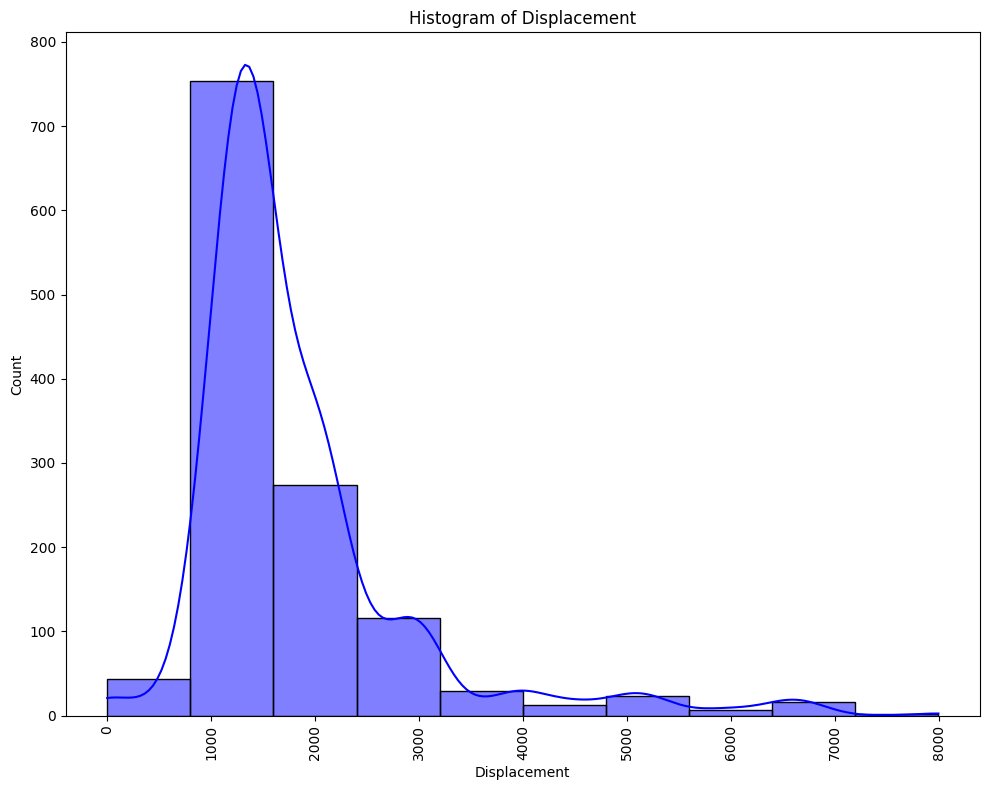

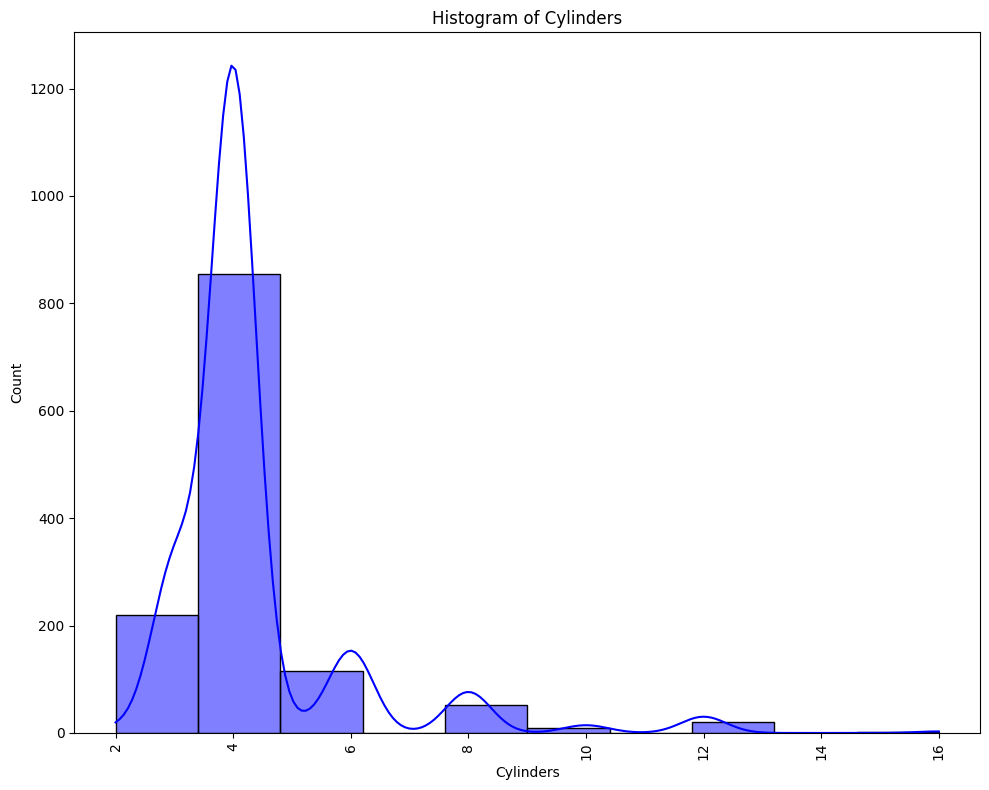

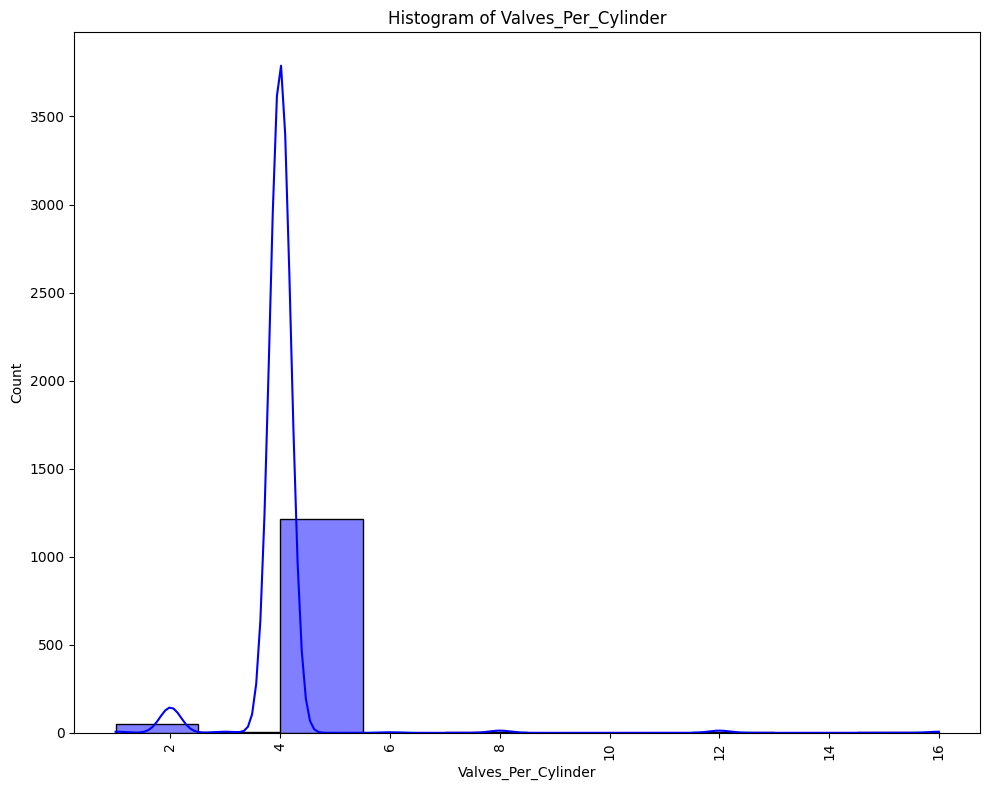

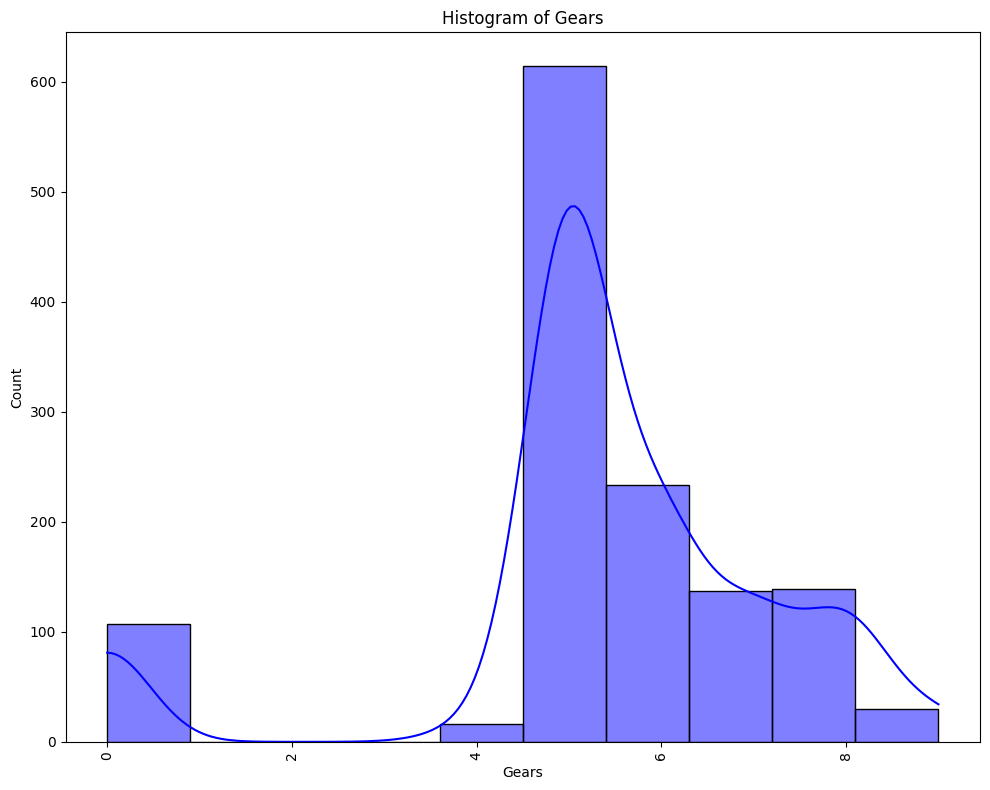

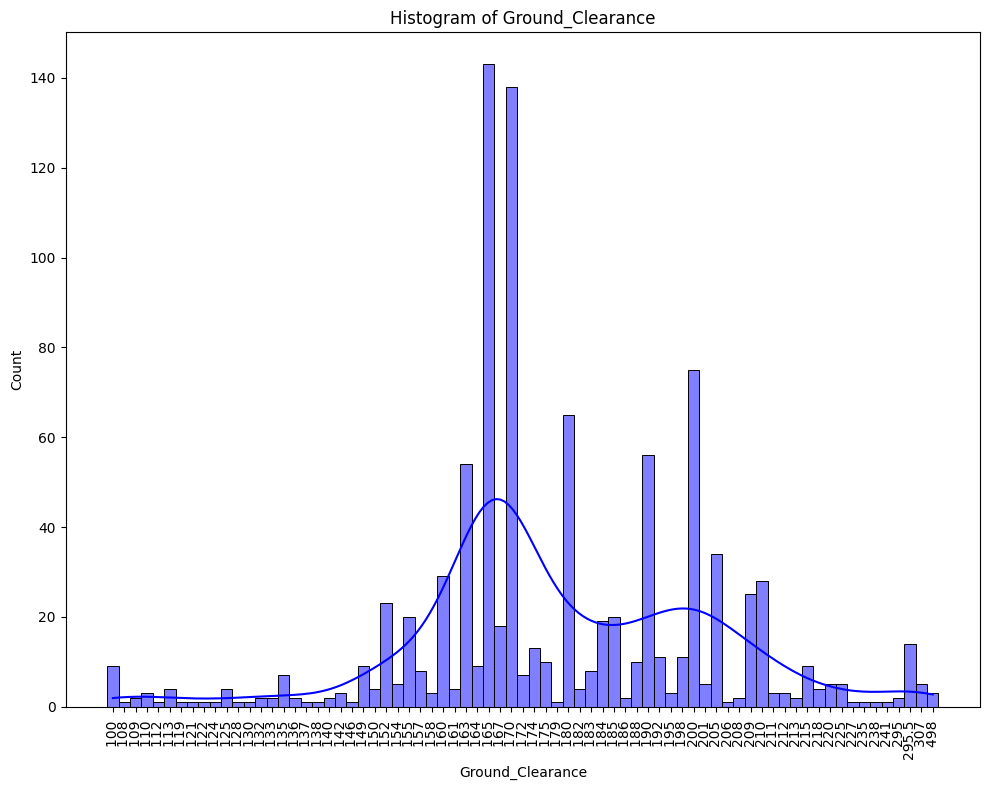

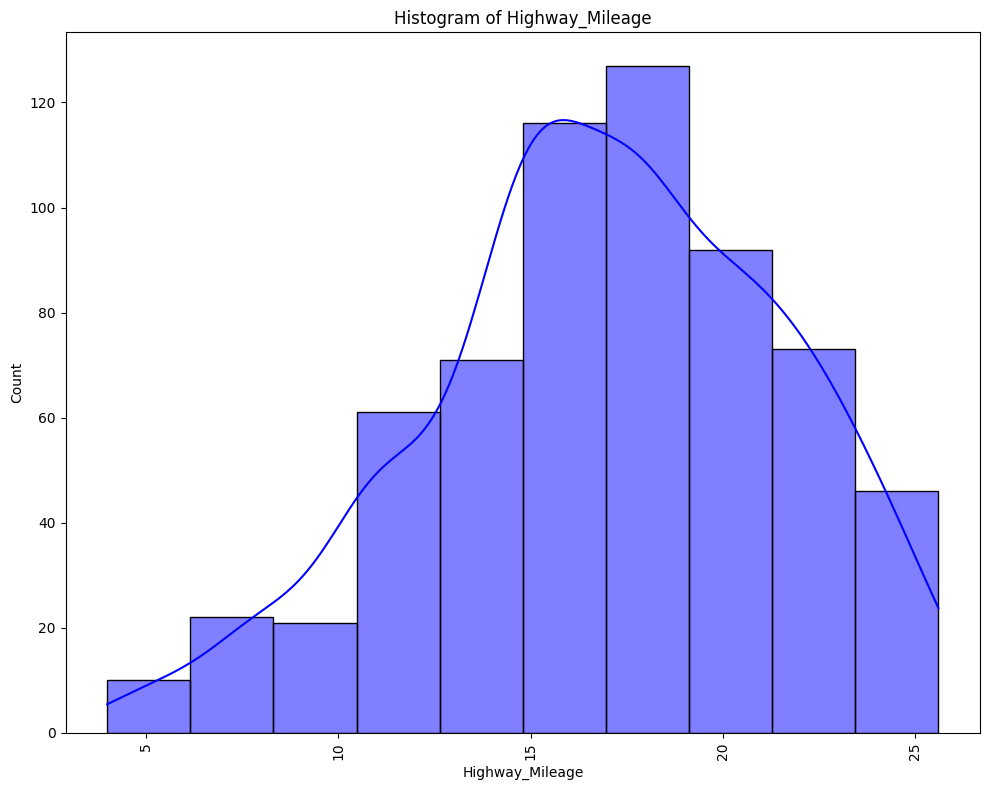

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'dataFrame'

# Specify the numeric columns you want to visualize
numeric_columns = ['Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Gears', 'Ground_Clearance', 'Highway_Mileage']

# Create separate histograms for each numeric variable
for column in numeric_columns:
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
    sns.histplot(dataFrame[column].dropna().sort_values(), kde=True, bins=10, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=90)
    plt.tight_layout()  # Automatically adjusts subplot parameters to give specified padding
    plt.show()


1. Highest number of cars has around 1250cc displacement.

2. Nearly 850 cars has 4 cylinders

3. Almost every Cars have 5 valves per cylinder

4. The cars with 160mm ground clearance tops the list whilst the second highest ground clearance rate is 170mm.

5. 120+ cars have the highway mileage around 17-18 km/hr.

In [29]:
dataFrame["Displacement"].dtypes

dtype('int64')

Bar charts
=====================
Bar charts to represent the count of categorical variables Based on Fuel Type, Transmission Type and By Car Brand

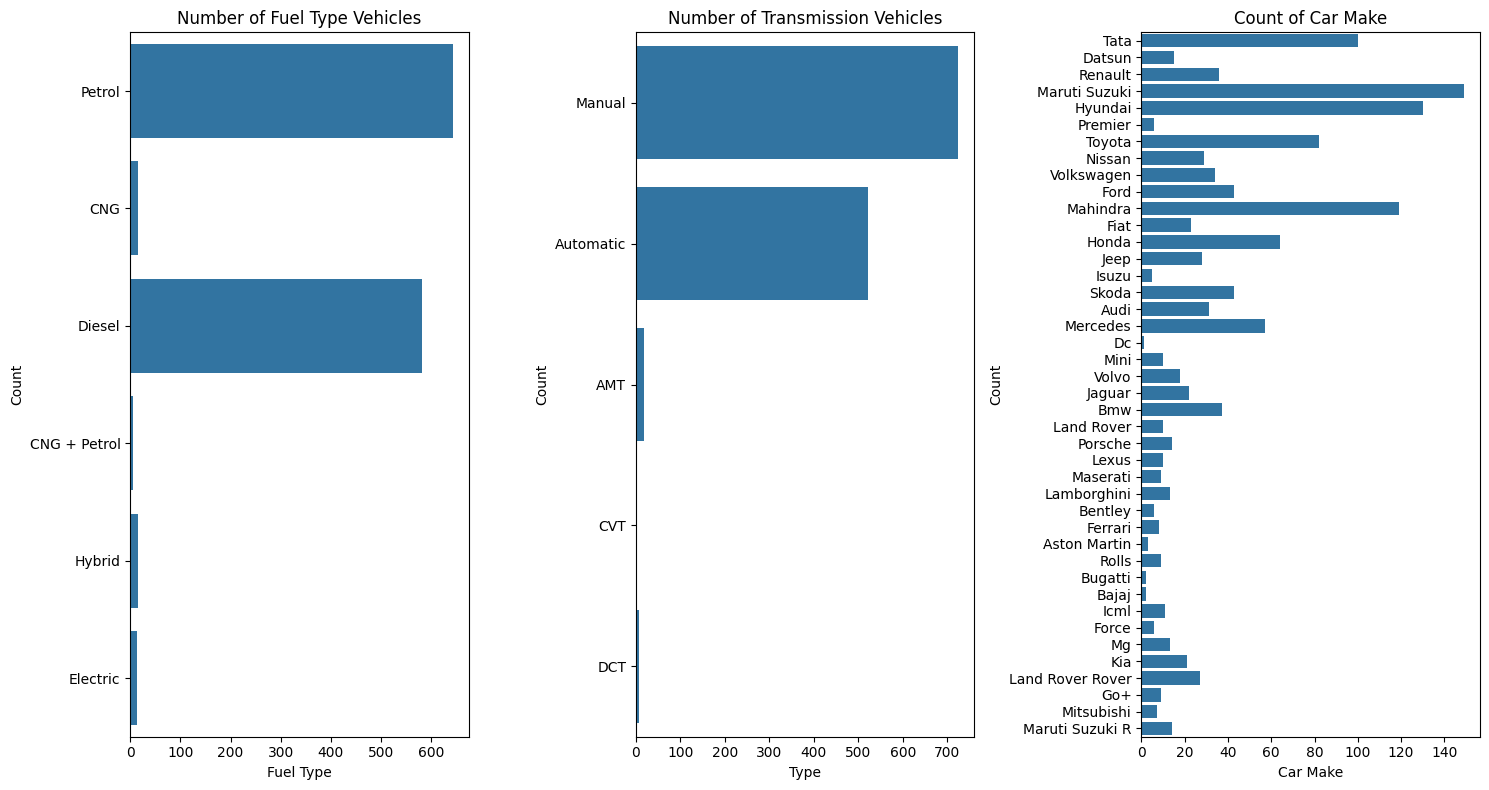

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'dataFrame'

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Create bar charts for Seating_Capacity
plt.subplot(1, 3, 1)
sns.countplot(dataFrame['Fuel_Type'])
plt.title('Number of Fuel Type Vehicles')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

# Create bar charts for Type
plt.subplot(1, 3, 2)
sns.countplot(dataFrame['Type'])
plt.title('Number of Transmission Vehicles')
plt.xlabel('Type')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.countplot(data=dataFrame, y='Make')
plt.title('Count of Car Make')
plt.xlabel('Car Make')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


1. Petrol and Diesel cars have the highest fuel type popularity while compared to the rest of the fuel types.

2. Many people prefer manual transmission cars over automatic, AMT, CVT, DCT. But  this preference is not universal as there are many who favor automatic gearboxes.

3. People tend to use the car brands - Maruti Suzuki, Hyundai,  Mahindra, Tata the most.


Box plots
=====================
Box plots to identify outliers and understand the distribution of numeric variables (Displacement, Doors,
                   City_Mileage, Highway_Mileage, Gears, Seating_Capacity,
                   Number_of_Airbags)

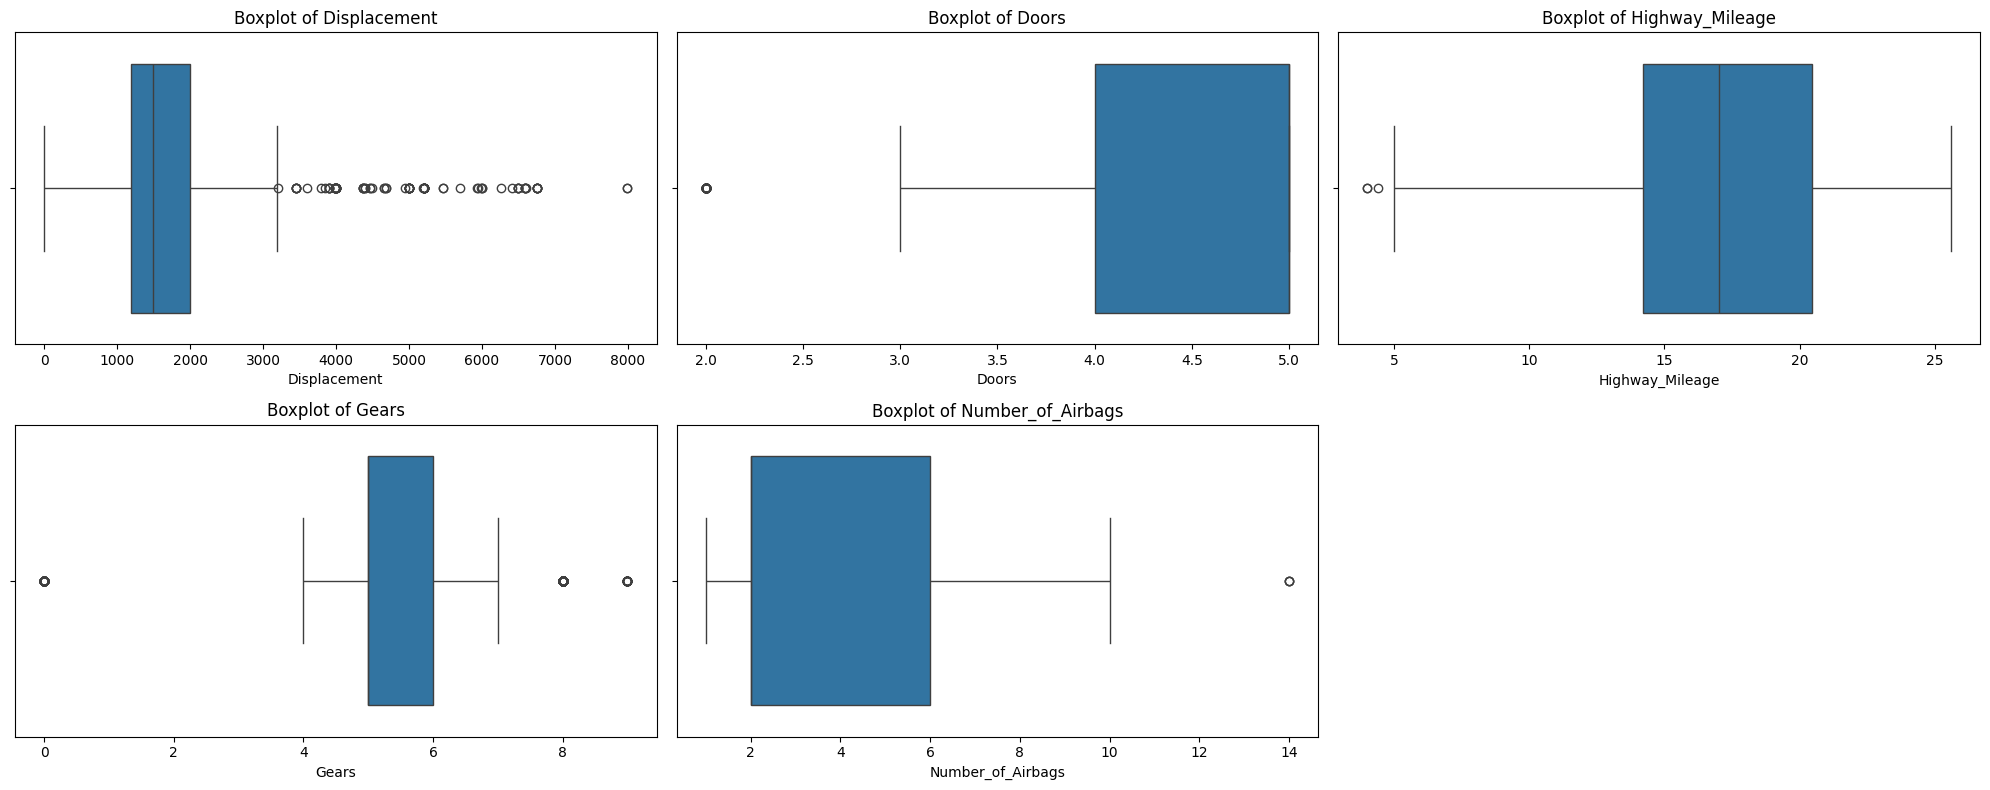

In [66]:
numeric_columns = ['Displacement', 'Doors',
                    'Highway_Mileage', 'Gears',
                   'Number_of_Airbags']

# Plot box plots for each selected numeric column
plt.figure(figsize=(20, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=dataFrame[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

1. Average displacement of cars being nearly 1400cc while there are lot of outliers(the plots above 3000cc)

2. Most of the cars tend to have 4 - 5 doors per car 

3. Average highway mileage is nearly 17kmph.

4. Very few cars have more than 8 gears. Most cars have 5/6 gear transmission.

5. There are cars with or without the airbags. We can see car that has 14 airbags while the average lies between 2-6

Pie Chart                                                                           
=====================


Represent the contribution of different car models or manufacturers using pie charts

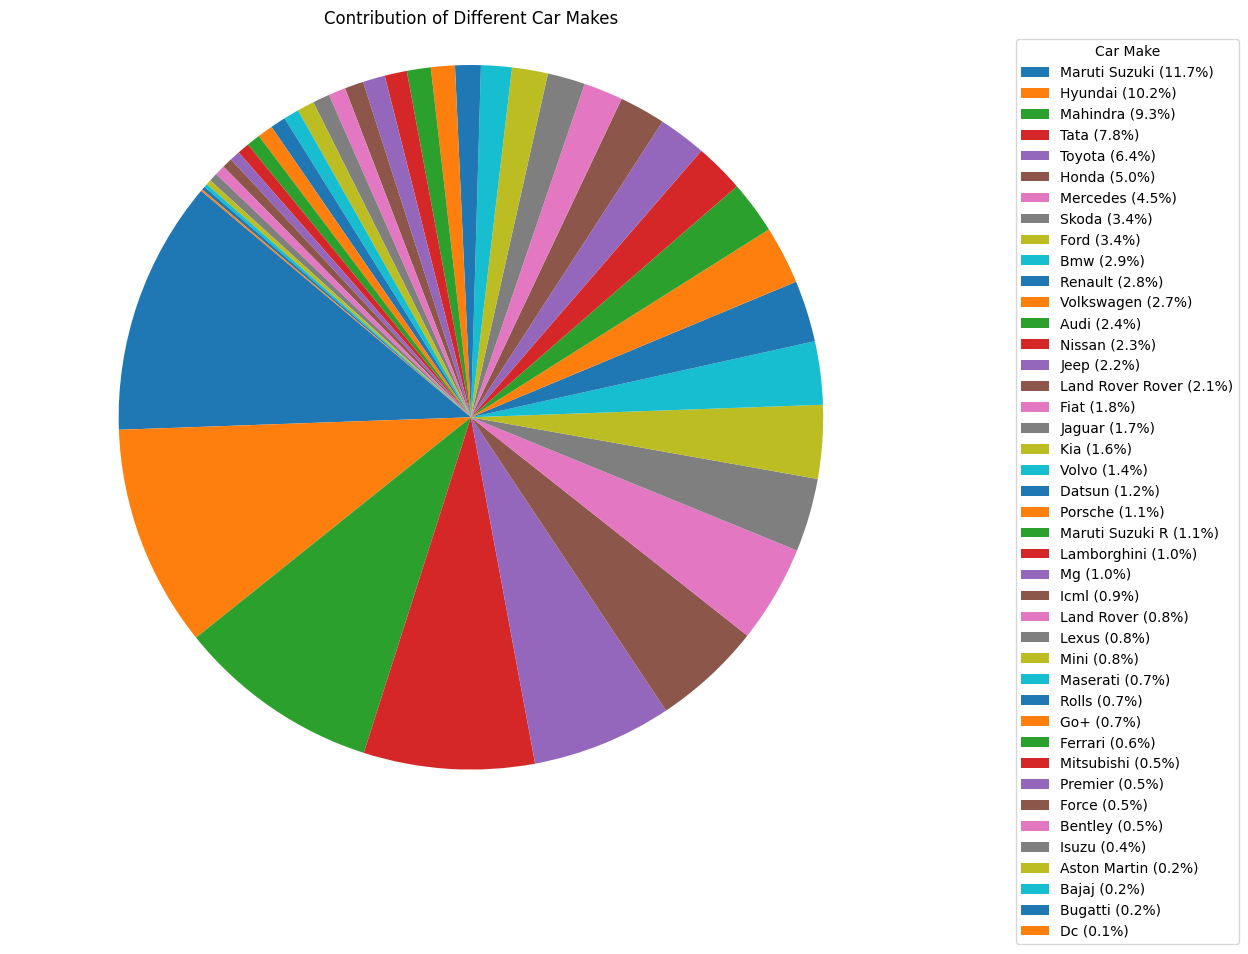

In [32]:
make_counts = dataFrame['Make'].value_counts()
# Plot a pie chart for car makes
plt.figure(figsize=(10, 10))
wedges, texts, _ = plt.pie(make_counts, labels=make_counts.index, startangle=140, autopct='', textprops=dict(color="w"))

# Add legend with percentage values
plt.legend([f'{make} ({percentage:.1f}%)' for make, percentage in zip(make_counts.index, make_counts / make_counts.sum() * 100)],
           title='Car Make', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))

# Set equal aspect ratio for a perfect circle
plt.axis('equal')

plt.title('Contribution of Different Car Makes')
plt.show()

Lot of People tend to use the car that are Maruti Suzuki, Hyundai,  Mahindra, Tata the most than the other brands.


Count Plots
===
Visualize the count of observations for categorical variables using count plots

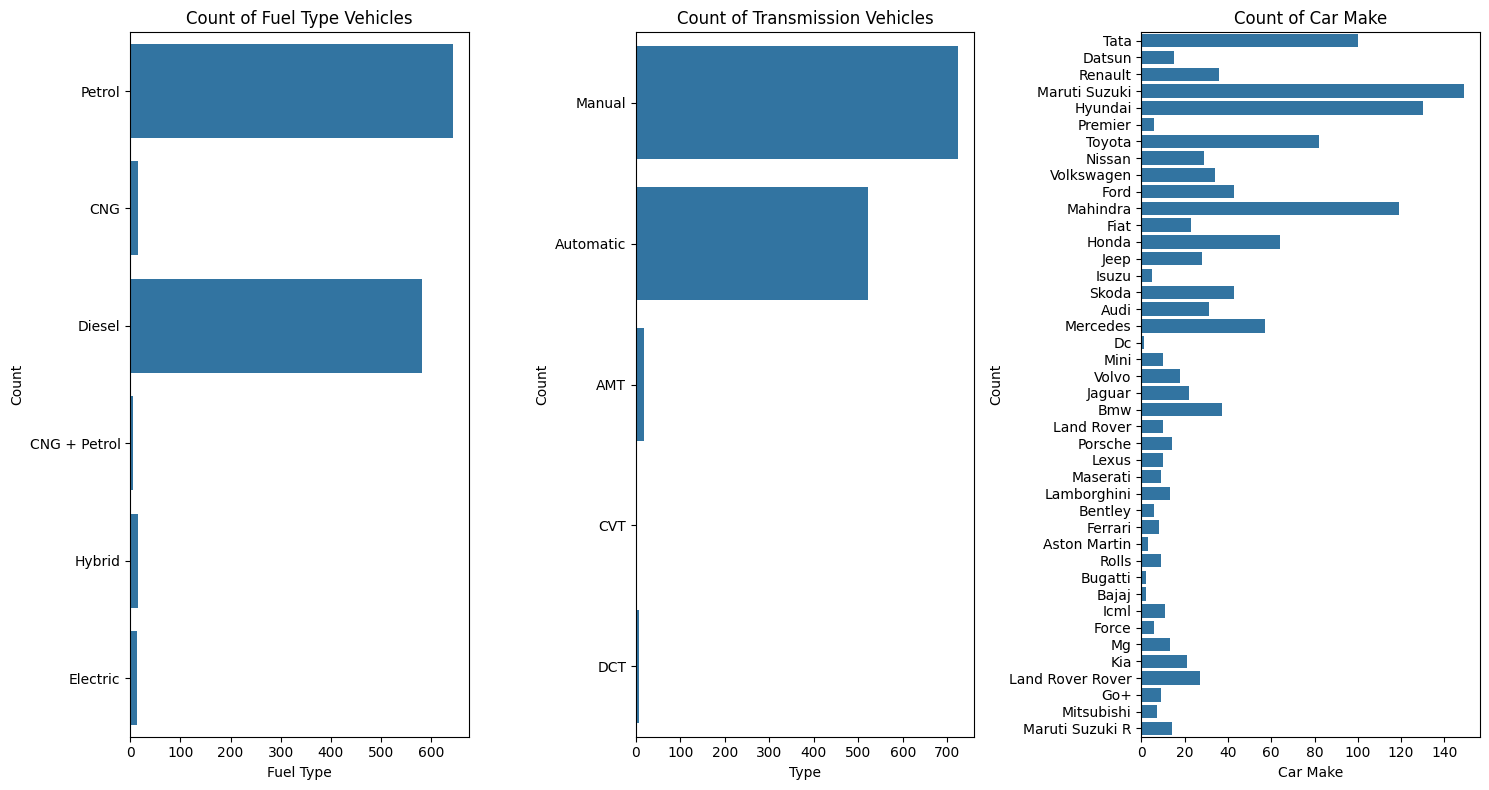

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Create bar charts for Seating_Capacity
plt.subplot(1, 3, 1)
sns.countplot(dataFrame['Fuel_Type'])
plt.title('Count of Fuel Type Vehicles')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

# Create bar charts for Type
plt.subplot(1, 3, 2)
sns.countplot(dataFrame['Type'])
plt.title('Count of Transmission Vehicles')
plt.xlabel('Type')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.countplot(data=dataFrame, y='Make')
plt.title('Count of Car Make')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


1. Petrol and Diesel cars have the highest fuel type popularity while compared to the rest of the fuel types.

2. Many people prefer manual transmission cars over automatic, AMT, CVT, DCT. But  this preference is not universal as there are many who favor automatic gearboxes.

3. People tend to use the car brands - Maruti Suzuki, Hyundai,  Mahindra, Tata the most.


Bivariate Analysis:
=====================


Correlation Matrix:
    Correlation matrix to understand the relationships between numeric variables


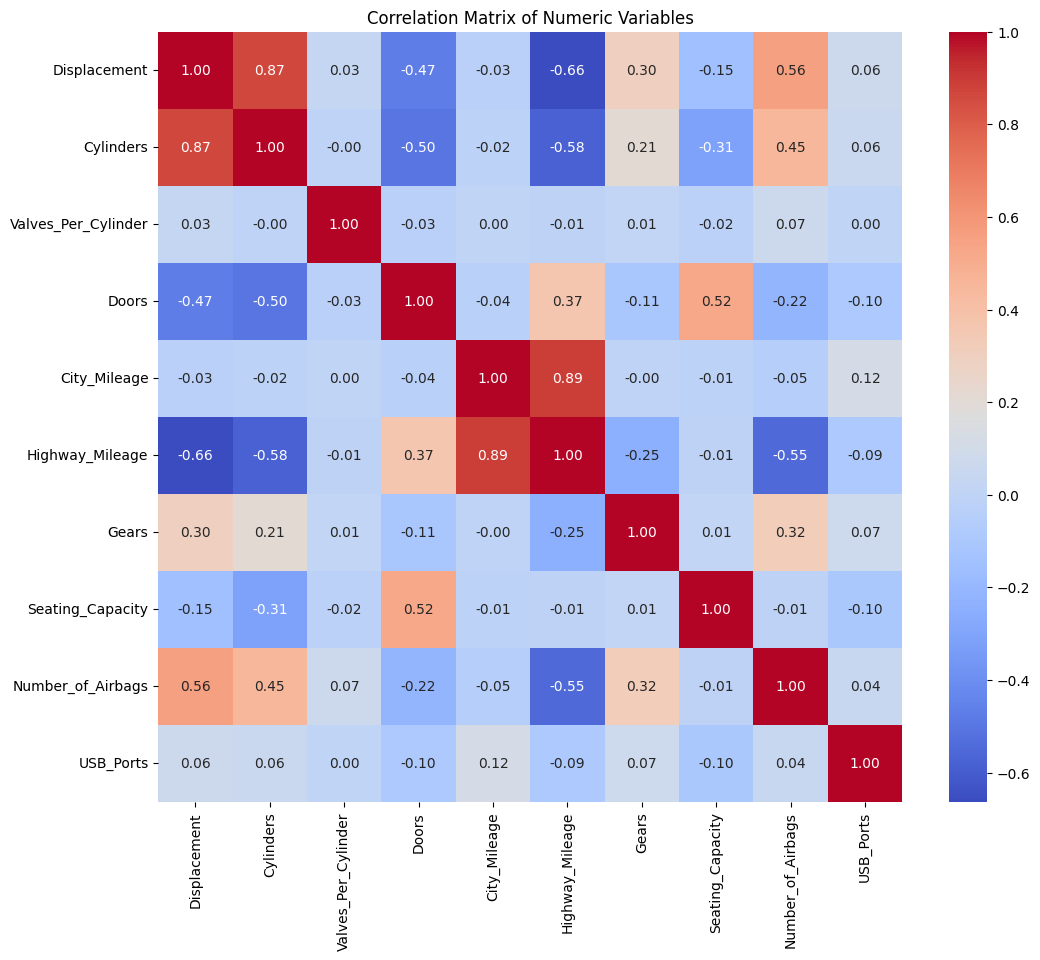

In [68]:
#Bivariate
dataFrame['Kerb_Weight'] = dataFrame['Kerb_Weight'].astype(str)
# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns from the DataFrame
numeric_columns = dataFrame.select_dtypes(include='number')

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


1. There is high correlation between cylinders vs displacement
2. There is high correlation between city mileage vs highway mileage
3. Lowest correlation between highway mileage vs displacement

Scatter plots to explore the relationships between the following pairs of numeric variables:
=====================
Valves_Per_Cylinder vs. Gears                                                                           

Doors vs. Seating_Capacity

Number_of_Airbags vs. USB_Ports

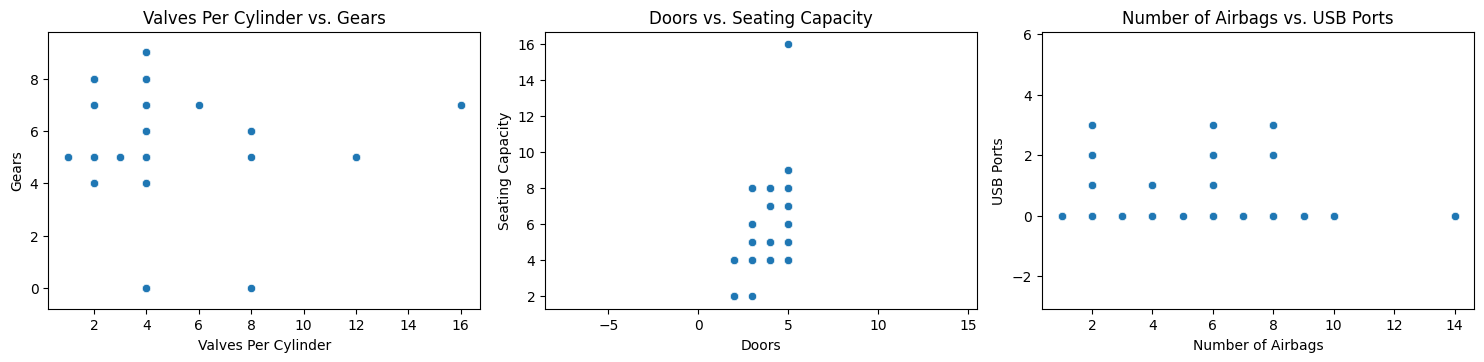

In [35]:
#scatterplot
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
plt.figure(figsize=(20, 10))

# Scatter plot: Valves_Per_Cylinder vs. Gears
plt.subplot(3, 4, 1)
sns.scatterplot(x='Valves_Per_Cylinder', y='Gears', data=dataFrame)
plt.title('Valves Per Cylinder vs. Gears')
plt.xlabel('Valves Per Cylinder')
plt.ylabel('Gears')
plt.axis('equal')

# Scatter plot: Doors vs. Seating_Capacity
plt.subplot(3, 4, 2)
sns.scatterplot(x='Doors', y='Seating_Capacity', data=dataFrame)
plt.title('Doors vs. Seating Capacity')
plt.xlabel('Doors')
plt.ylabel('Seating Capacity')
plt.axis('equal')

# Scatter plot: Number_of_Airbags vs. USB_Ports
plt.subplot(3, 4, 3)
sns.scatterplot(x='Number_of_Airbags', y='USB_Ports', data=dataFrame)
plt.title('Number of Airbags vs. USB Ports')
plt.xlabel('Number of Airbags')
plt.ylabel('USB Ports')
plt.axis('equal')

# Adjust layout
plt.tight_layout()
plt.show()


From the above scatter plot we can see that
    1. 

Pairplot 
===
Pair plots for a quick overview of relationships between multiple numeric variables(Displacement, Cylinders, Valves_Per_Cylinder, Doors, City_Mileage, Highway_Mileage, Gears, Seating_Capacity, Number_of_Airbags, USB_Ports)

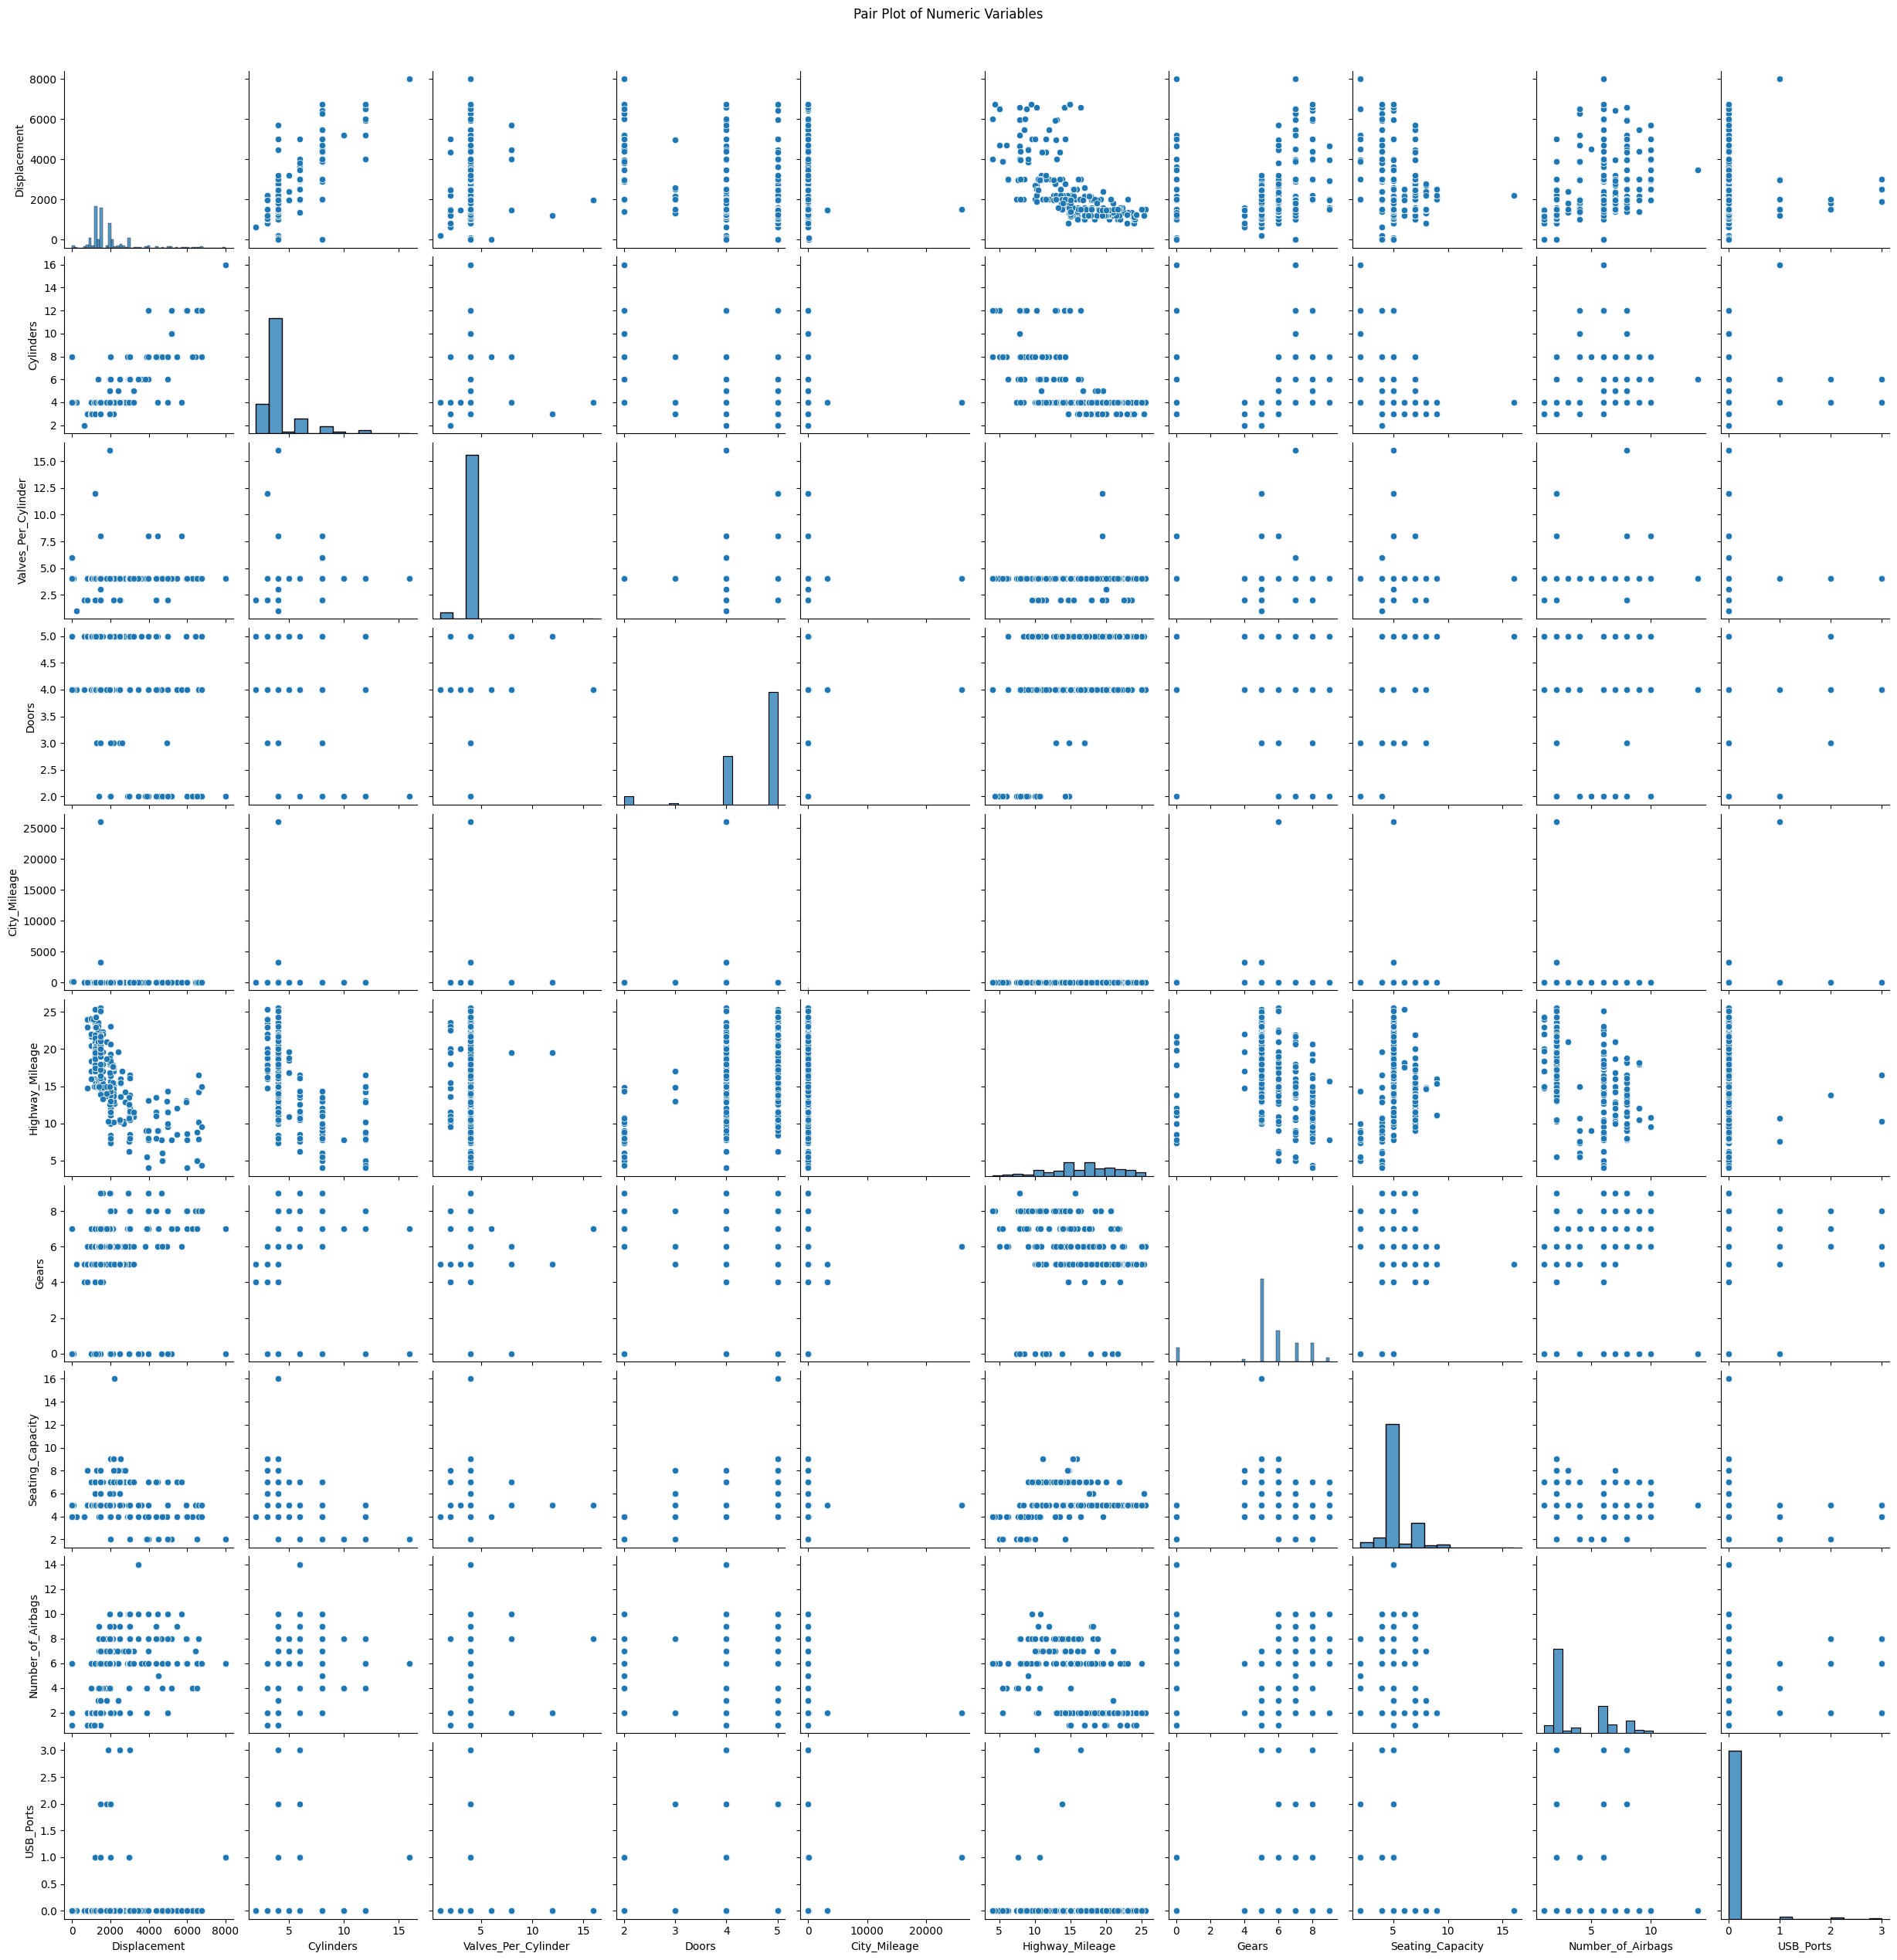

In [36]:
#Pairplot
# Select numeric variables for pair plot
numeric_vars = ['Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Doors', 'City_Mileage', 'Highway_Mileage', 'Gears', 'Seating_Capacity', 'Number_of_Airbags', 'USB_Ports']

# Subset the data with only numeric variables
numeric_data = dataFrame[numeric_vars]

# Create pair plot
sns.pairplot(numeric_data)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()


Bar Charts with Hue:
===
Enhance bar charts by introducing the 'hue' parameter to represent additional categorical variables.

Type vs City Mileage

Gears vs Cylinders


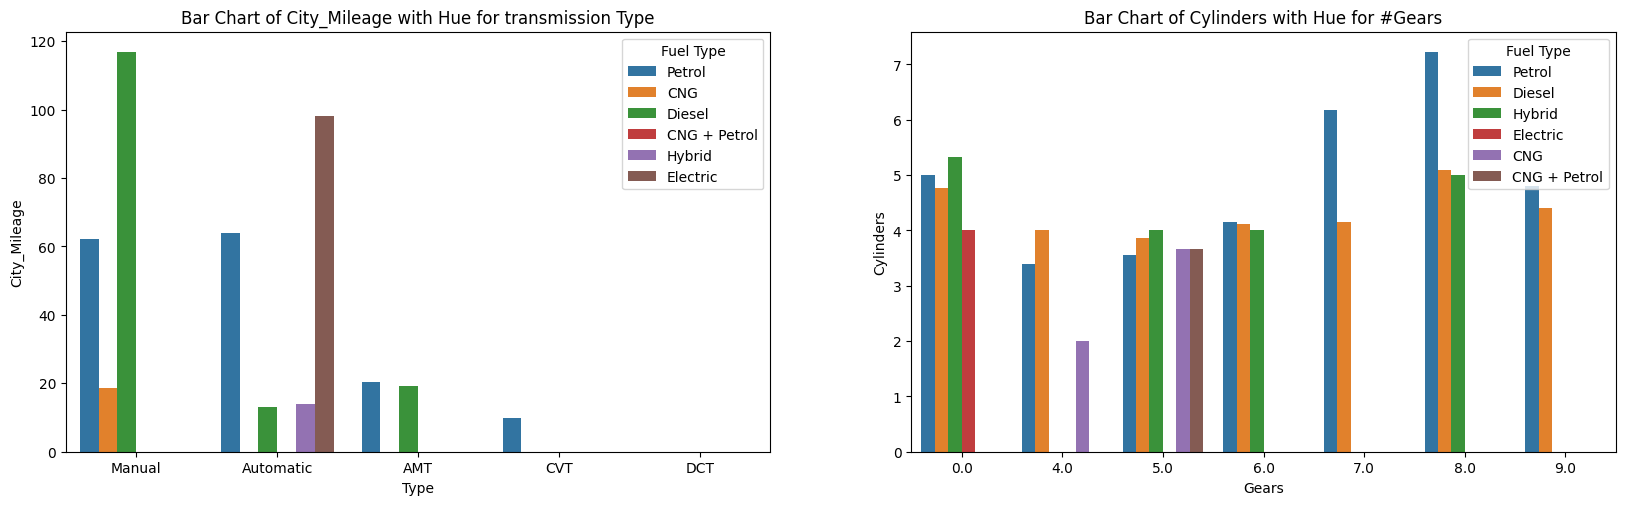

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical and numeric variables for bar chart
categorical_var = 'Type'  # Change this to the desired categorical variable
numeric_var = 'City_Mileage'  # Change this to the desired numeric variable

# Create a bar chart with hue
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.barplot(x=categorical_var, y=numeric_var, hue='Fuel_Type', data=dataFrame, errorbar=None)  # You can change 'Fuel_Type' to another categorical variable
plt.title(f'Bar Chart of {numeric_var} with Hue for transmission {categorical_var}')
plt.xlabel(categorical_var)
plt.ylabel(numeric_var)
plt.legend(title='Fuel Type')  # Legend for 'Fuel_Type'


categorical_var2 = 'Gears'  # Change this to the desired categorical variable
numeric_var2 = 'Cylinders' 

plt.subplot(2, 2, 2)
sns.barplot(x=categorical_var2, y=numeric_var2, hue='Fuel_Type', data=dataFrame,errorbar=None)  # You can change 'Fuel_Type' to another categorical variable
plt.title(f'Bar Chart of {numeric_var2} with Hue for #Gears')
plt.xlabel(categorical_var2)
plt.ylabel(numeric_var2)
plt.legend(title='Fuel Type')  # Legend for 'Fuel_Type'

plt.show()


City Mileage vs Transmission Type

        1. Most cars tend to have higher city mileage in Diesel cars with manual transmission.

        2. In automatic transmissions, EV cars has the highest city mileage

Gears vs Cylinders

        1. Mostly all the cars with gears have more cylinders with petrol fuel type than rest of others.

        2. Following petrol cars,  diesel cars also have more cylinders compared to hybrid / electric cars.


Heatmaps
===
Heatmaps to visually represent the correlation matrix for better insights

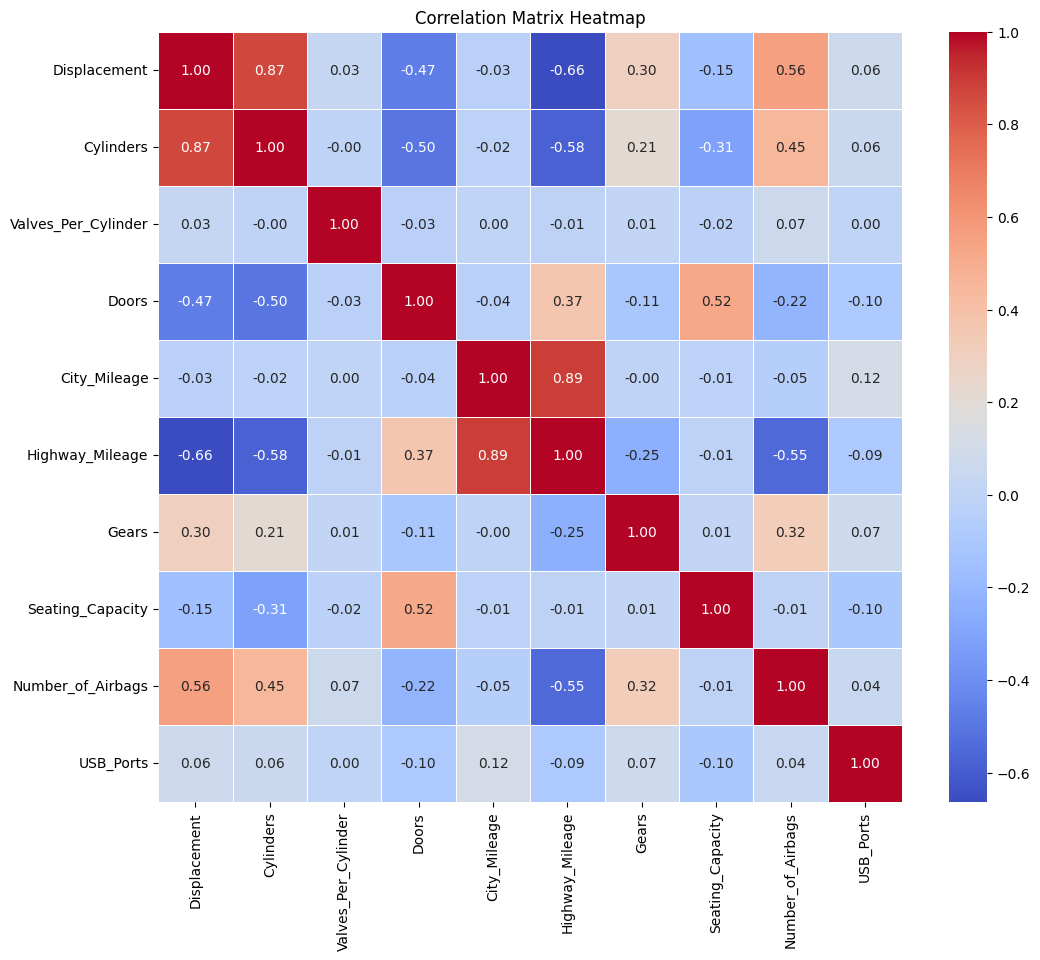

In [38]:
#Heat Map for Correlation Matrix
# Select relevant numeric columns for correlation matrix
numeric_columns = ['Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Doors', 
                    'City_Mileage', 'Highway_Mileage', 'Gears', 'Seating_Capacity', 
                    'Number_of_Airbags', 'USB_Ports']

# Create a subset of the dataframe with only numeric columns
numeric_data = dataFrame[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


1. There is high correlation between cylinders vs displacement
2. There is high correlation between city mileage vs highway mileage
3. Lowest correlation between highway mileage vs displacement

Joint plot
===
Joint plots to display the distribution of two numeric variables and their relationship.

Displacement vs City Mileage

Gears vs City Mileage

<Figure size 1200x800 with 0 Axes>

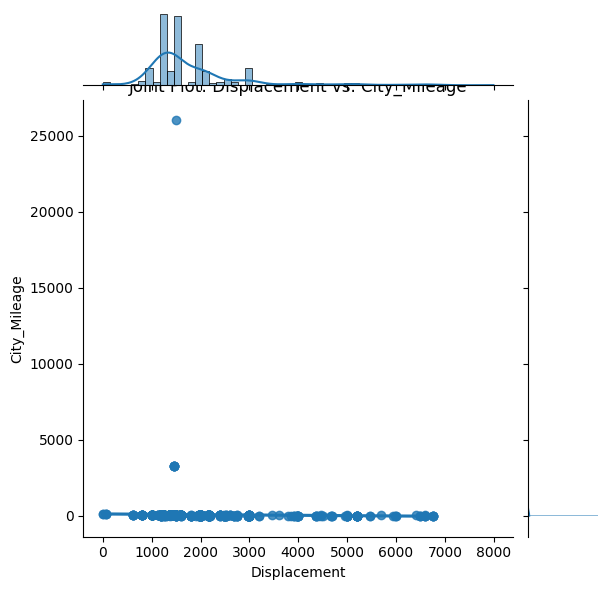

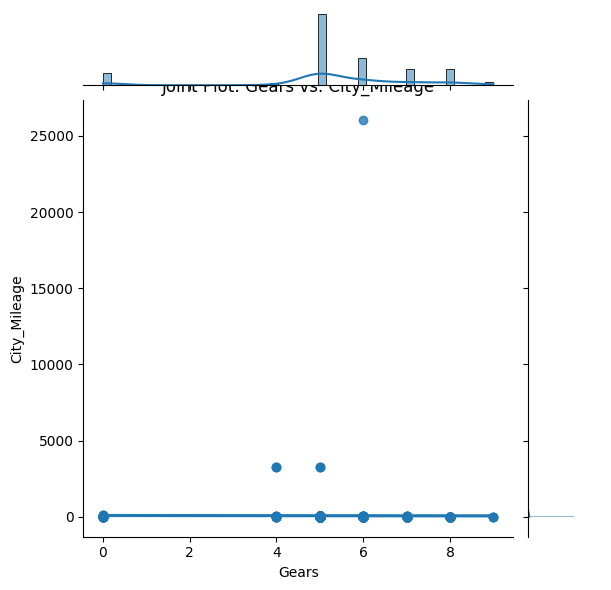

In [39]:

# Select numeric variables for joint plot
x1 = 'Displacement'
y1 = 'City_Mileage'
plt.figure(figsize=(12, 8))
sns.jointplot(x=x1, y=y1, data=dataFrame, kind='reg')
plt.title(f'Joint Plot: {x1} vs. {y1}')


x2 = "Gears"
y2 = 'City_Mileage'
sns.jointplot(x=x2, y=y2, data=dataFrame, kind='reg')
plt.title(f'Joint Plot: {x2} vs. {y2}')
plt.show()



Box Plots with Hue
===
Enhance box plots by introducing the 'hue' parameter to represent additional categorical variables(Displacement, Doors, City_Mileage, Highway_Mileage, Seating_Capacity, Number_of_Airbags)

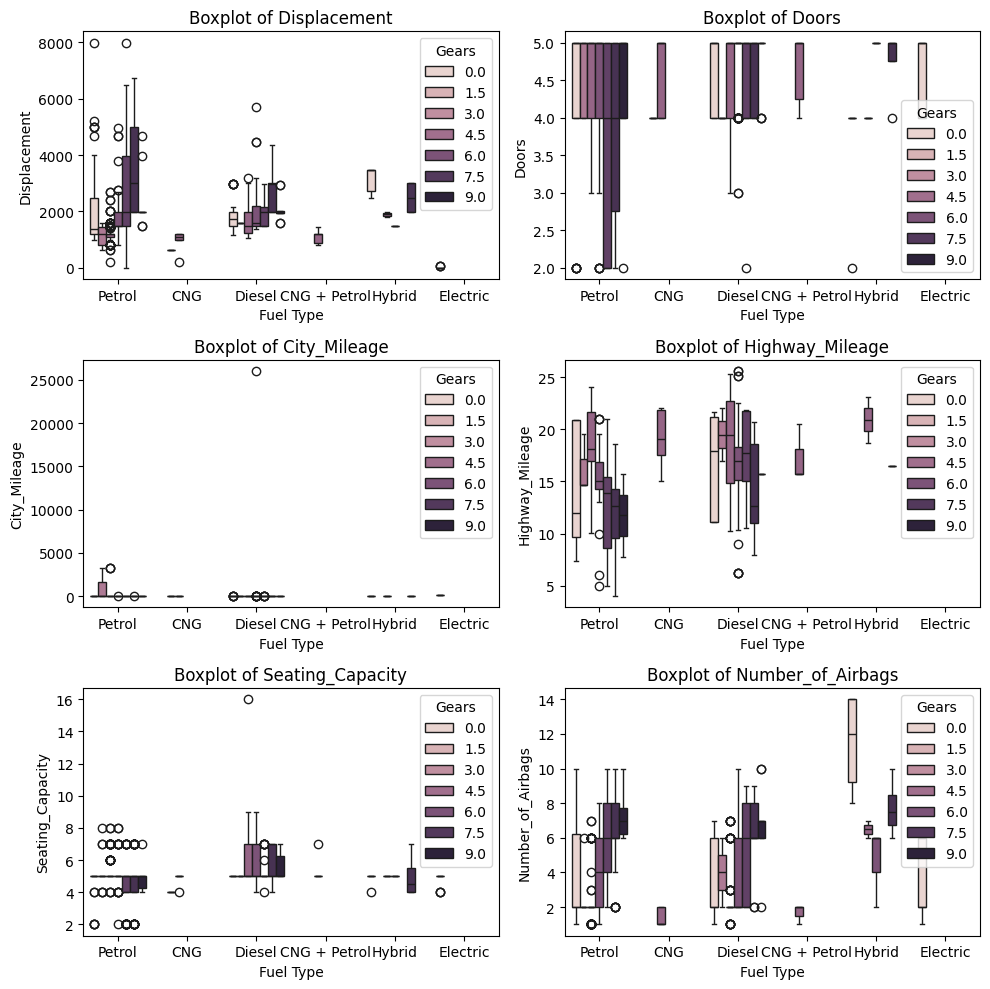

In [40]:

numeric_columns = ['Displacement', 'Doors', 'City_Mileage', 'Highway_Mileage', 'Seating_Capacity', 'Number_of_Airbags']

# Plot box plots for each selected numeric column with 'hue'
plt.figure(figsize=(10, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Fuel_Type', y=dataFrame[column].dropna(), hue='Gears', data=dataFrame)
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Fuel Type')
    plt.ylabel(column)
    plt.legend(title='Gears')  # Legend for 'Gears'

plt.tight_layout()
plt.show()


Categorical Plots
===

Relationships between categorical and numeric variables using categorical plots

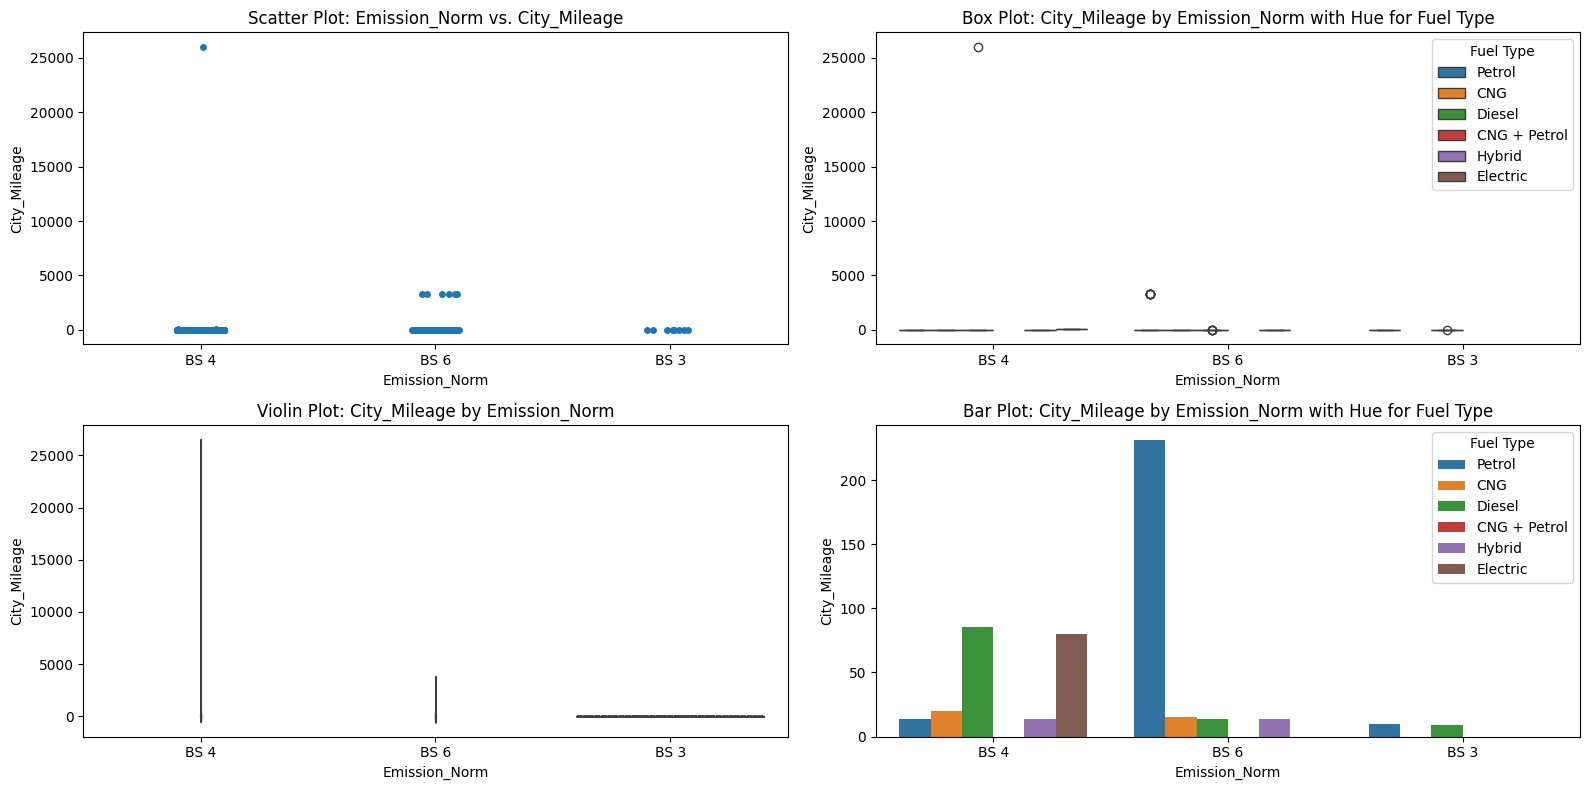

In [41]:
categorical_var = 'Emission_Norm'  # Change this to the desired categorical variable
numeric_var = 'City_Mileage'  # Change this to the desired numeric variable

# Categorical scatter plot
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.stripplot(x=categorical_var, y=numeric_var, data=dataFrame, jitter=True)
plt.title(f'Scatter Plot: {categorical_var} vs. {numeric_var}')
plt.xlabel(categorical_var)
plt.ylabel(numeric_var)

# Box plot with hue
plt.subplot(2, 2, 2)
sns.boxplot(x=categorical_var, y=numeric_var, hue='Fuel_Type', data=dataFrame)
plt.title(f'Box Plot: {numeric_var} by {categorical_var} with Hue for Fuel Type')
plt.xlabel(categorical_var)
plt.ylabel(numeric_var)
plt.legend(title='Fuel Type')

# Violin plot
plt.subplot(2, 2, 3)
sns.violinplot(x=categorical_var, y=numeric_var, data=dataFrame, inner='quartile')
plt.title(f'Violin Plot: {numeric_var} by {categorical_var}')
plt.xlabel(categorical_var)
plt.ylabel(numeric_var)

# Bar plot with hue
plt.subplot(2, 2, 4)
sns.barplot(x=categorical_var, y=numeric_var, hue='Fuel_Type', data=dataFrame, errorbar=None)
plt.title(f'Bar Plot: {numeric_var} by {categorical_var} with Hue for Fuel Type')
plt.xlabel(categorical_var)
plt.ylabel(numeric_var)
plt.legend(title='Fuel Type')

plt.tight_layout()
plt.show()


Violin Plots
===
Visualize the distribution of numeric variables across different categories using violin plots.

<Figure size 1600x1200 with 0 Axes>

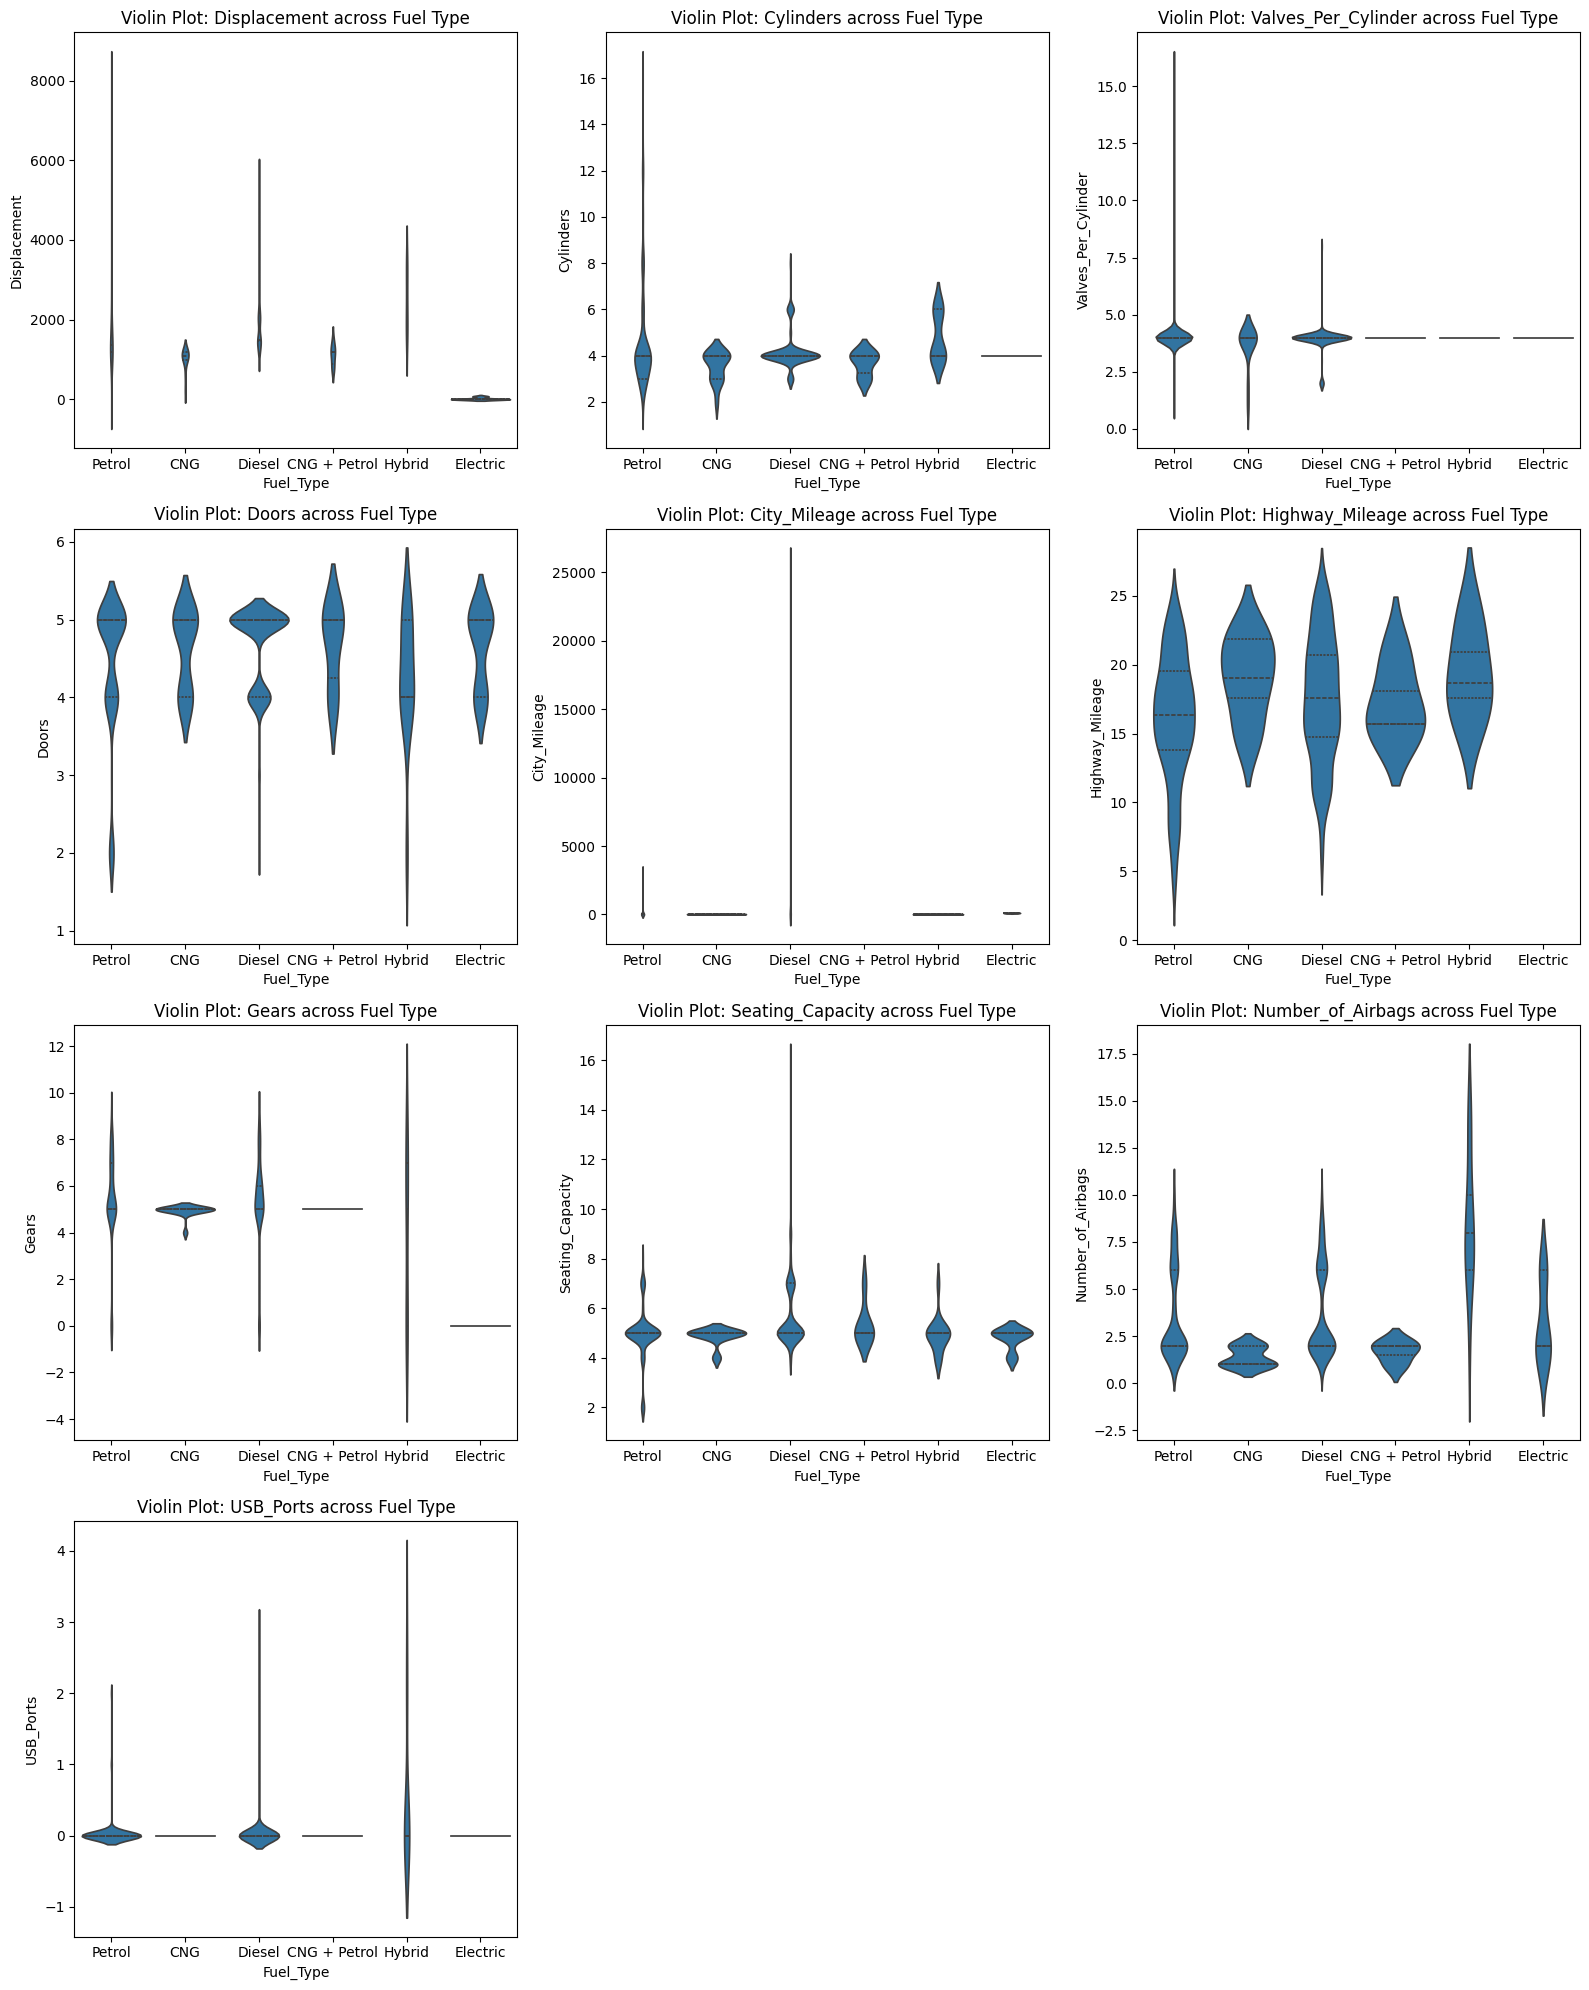

In [69]:
numeric_columns = dataFrame.select_dtypes(include='number').columns
plt.figure(figsize=(16, 12))
num_subplots = len(numeric_columns)
num_rows = (num_subplots // 3) + (num_subplots % 3)
dataFrame['Kerb_Weight'] = dataFrame['Kerb_Weight'].astype(str)
# Create violin plots for numeric columns
plt.figure(figsize=(16, 5 * num_rows))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.violinplot(x='Fuel_Type', y=column, data=dataFrame, inner='quartile')
    plt.title(f'Violin Plot: {column} across Fuel Type')

plt.tight_layout()

plt.show()

Stacked Bar Charts:
===
Represent the combined contribution of different categories using stacked bar charts.

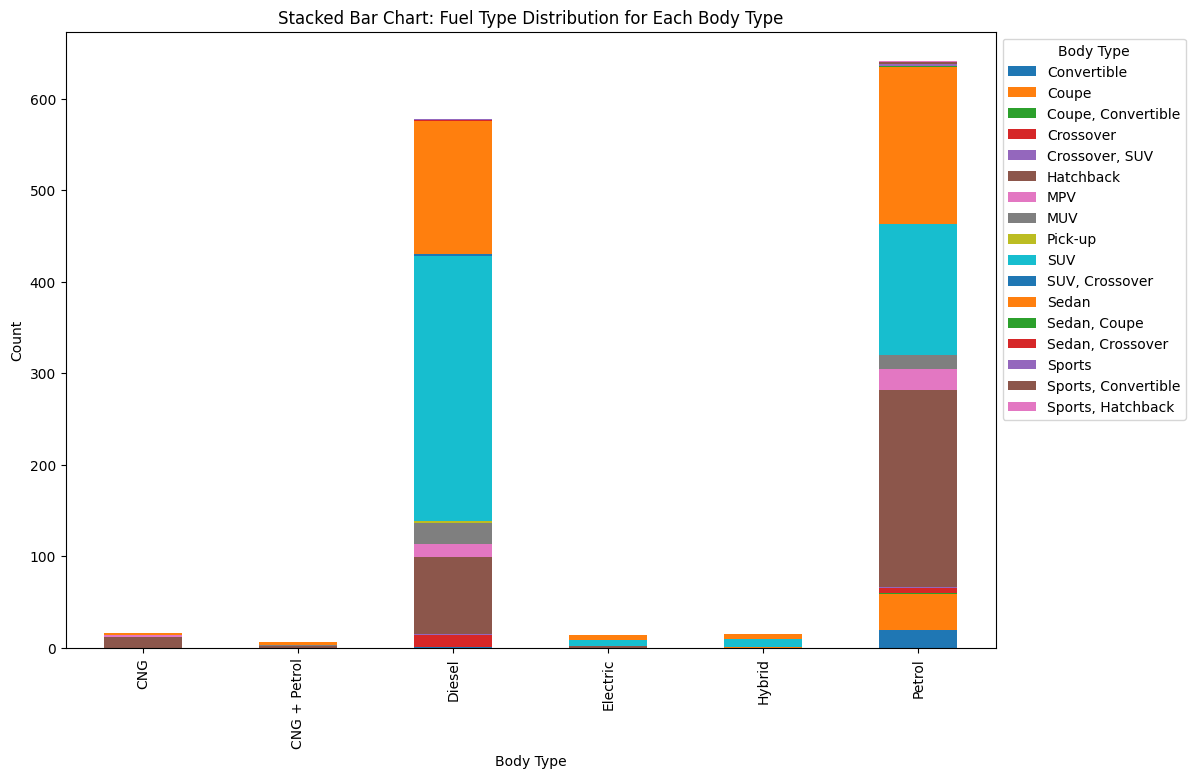

In [43]:
#Stacked Columns
# Filter relevant columns
categorical_columns = ['Fuel_Type', 'Body_Type']

# Create a DataFrame with relevant columns
stacked_data = dataFrame[categorical_columns]

# Count the occurrences of each combination
stacked_counts = stacked_data.groupby(categorical_columns).size().unstack(fill_value=0)

# Plot stacked bar chart
stacked_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart: Fuel Type Distribution for Each Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.legend(title='Body Type', bbox_to_anchor=(1, 1))

plt.show()